In [25]:
# pull in dependencies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets

import seaborn as sns

pd.options.display.max_columns = 200


In [31]:
#read in the CSV file
happyData = pd.read_csv('Data/Clean Data/HappynessCleanDataFinal.csv', index_col=False) 
happyData.head()

,Country,Region,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,GDP2016,Freedom2016,Generosity2016,Year2016,Corruption2016,Happiness2017,GDP2017,Freedom2017,Generosity2017,Year2017,Corruption2017,Happiness2018,GDP2018,Freedom2018,Generosity2018,Year2018,Corruption2018,Happiness2019,GDP2019,Freedom2019,Generosity2019,Year2019,Corruption2019,Happiness2020,GDP2020,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021
0,Switzerland,Western Europe,7.587,1.39651,0.66557,0.29678,2015,0.41978,7.509,1.52733,0.58557,0.28083,2016,0.41203,7.494,1.564980,0.620071,0.290549,2017,0.367007,7.487,1.420,0.660,0.256,2018,0.357,7.480,1.452,0.572,0.263,2019,0.343,7.5599,1.390774,0.921337,0.269056,2020,0.303728,7.571,1.566,0.919,0.204,2021,0.292
1,Iceland,Western Europe,7.561,1.30232,0.62877,0.43630,2015,0.14145,7.501,1.42666,0.56624,0.47678,2016,0.14975,7.504,1.480633,0.627163,0.475540,2017,0.153527,7.495,1.343,0.677,0.353,2018,0.138,7.494,1.380,0.591,0.354,2019,0.118,7.5045,1.326502,0.948892,0.362330,2020,0.711710,7.554,1.482,0.955,0.293,2021,0.673
2,Denmark,Western Europe,7.527,1.32548,0.64938,0.34139,2015,0.48357,7.526,1.44178,0.57941,0.36171,2016,0.44453,7.522,1.482383,0.626007,0.355280,2017,0.400770,7.555,1.351,0.683,0.284,2018,0.408,7.600,1.383,0.592,0.252,2019,0.410,7.6456,1.326949,0.951444,0.242793,2020,0.168489,7.620,1.502,0.946,0.208,2021,0.179
3,Norway,Western Europe,7.522,1.45900,0.66973,0.34699,2015,0.36503,7.498,1.57744,0.59609,0.37895,2016,0.35776,7.537,1.616463,0.635423,0.362012,2017,0.315964,7.594,1.456,0.686,0.286,2018,0.340,7.554,1.488,0.603,0.271,2019,0.341,7.4880,1.424207,0.955750,0.287985,2020,0.263218,7.392,1.543,0.960,0.249,2021,0.270
4,Canada,North America,7.427,1.32629,0.63297,0.45811,2015,0.32957,7.404,1.44015,0.57370,0.44834,2016,0.31329,7.316,1.479204,0.611101,0.435540,2017,0.287372,7.328,1.330,0.653,0.321,2018,0.291,7.278,1.365,0.584,0.285,2019,0.308,7.2321,1.301648,0.933913,0.281529,2020,0.390843,7.103,1.447,0.915,0.246,2021,0.415


In [27]:
#get the top 10 and the lowest 10 happiness scores
happiest = happyData.head(10)
saddest = happyData.tail(10)

#create common key so i can merge both dataframes
happiest['key'] = "happysad"
saddest['key'] = "happysad"

#stack the two dataframes together on the key i made
HappySad = pd.concat([happiest,saddest], ignore_index=True)
HappySad

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Country,Region,Happiness2015,GDP2015,Freedom2015,Generosity2015,Year2015,Corruption2015,Happiness2016,GDP2016,Freedom2016,Generosity2016,Year2016,Corruption2016,Happiness2017,GDP2017,Freedom2017,Generosity2017,Year2017,Corruption2017,Happiness2018,GDP2018,Freedom2018,Generosity2018,Year2018,Corruption2018,Happiness2019,GDP2019,Freedom2019,Generosity2019,Year2019,Corruption2019,Happiness2020,GDP2020,Freedom2020,Generosity2020,Year2020,Corruption2020,Happiness2021,GDP2021,Freedom2021,Generosity2021,Year2021,Corruption2021,key
0,Switzerland,Western Europe,7.587,1.39651,0.66557,0.29678,2015,0.41978,7.509,1.52733,0.58557,0.28083,2016,0.41203,7.494,1.564980,0.620071,0.290549,2017,0.367007,7.487,1.420,0.660,0.256,2018,0.357,7.480,1.452,0.572,0.263,2019,0.343,7.5599,1.390774,0.921337,0.269056,2020,0.303728,7.571,1.566,0.919,0.204,2021,0.292,happysad
1,Iceland,Western Europe,7.561,1.30232,0.62877,0.43630,2015,0.14145,7.501,1.42666,0.56624,0.47678,2016,0.14975,7.504,1.480633,0.627163,0.475540,2017,0.153527,7.495,1.343,0.677,0.353,2018,0.138,7.494,1.380,0.591,0.354,2019,0.118,7.5045,1.326502,0.948892,0.362330,2020,0.711710,7.554,1.482,0.955,0.293,2021,0.673,happysad
2,Denmark,Western Europe,7.527,1.32548,0.64938,0.34139,2015,0.48357,7.526,1.44178,0.57941,0.36171,2016,0.44453,7.522,1.482383,0.626007,0.355280,2017,0.400770,7.555,1.351,0.683,0.284,2018,0.408,7.600,1.383,0.592,0.252,2019,0.410,7.6456,1.326949,0.951444,0.242793,2020,0.168489,7.620,1.502,0.946,0.208,2021,0.179,happysad
3,Norway,Western Europe,7.522,1.45900,0.66973,0.34699,2015,0.36503,7.498,1.57744,0.59609,0.37895,2016,0.35776,7.537,1.616463,0.635423,0.362012,2017,0.315964,7.594,1.456,0.686,0.286,2018,0.340,7.554,1.488,0.603,0.271,2019,0.341,7.4880,1.424207,0.955750,0.287985,2020,0.263218,7.392,1.543,0.960,0.249,2021,0.270,happysad
4,Canada,North America,7.427,1.32629,0.63297,0.45811,2015,0.32957,7.404,1.44015,0.57370,0.44834,2016,0.31329,7.316,1.479204,0.611101,0.435540,2017,0.287372,7.328,1.330,0.653,0.321,2018,0.291,7.278,1.365,0.584,0.285,2019,0.308,7.2321,1.301648,0.933913,0.281529,2020,0.390843,7.103,1.447,0.915,0.246,2021,0.415,happysad
5,Finland,Western Europe,7.406,1.29025,0.64169,0.23351,2015,0.41372,7.413,1.40598,0.57104,0.25492,2016,0.41004,7.469,1.443572,0.617951,0.245483,2017,0.382612,7.632,1.305,0.681,0.202,2018,0.393,7.769,1.340,0.596,0.153,2019,0.393,7.8087,1.285190,0.949172,0.159670,2020,0.195445,7.842,1.446,0.949,0.124,2021,0.186,happysad
6,Netherlands,Western Europe,7.378,1.32944,0.61576,0.47610,2015,0.31814,7.339,1.46468,0.55211,0.47416,2016,0.29927,7.377,1.503945,0.585384,0.470490,2017,0.282662,7.441,1.361,0.638,0.333,2018,0.295,7.488,1.396,0.557,0.322,2019,0.298,7.4489,1.338946,0.908548,0.336318,2020,0.364717,7.464,1.501,0.913,0.302,2021,0.338,happysad
7,Sweden,Western Europe,7.364,1.33171,0.65980,0.36262,2015,0.43844,7.291,1.45181,0.58218,0.38254,2016,0.40867,7.284,1.494387,0.612924,0.385399,2017,0.384399,7.314,1.355,0.659,0.285,2018,0.383,7.343,1.387,0.574,0.267,2019,0.373,7.3535,1.322235,0.939144,0.272828,2020,0.250880,7.363,1.478,0.945,0.244,2021,0.237,happysad
8,New Zealand,Australia and New Zealand,7.286,1.25018,0.63938,0.47501,2015,0.42922,7.334,1.36066,0.58147,0.49401,2016,0.41904,7.314,1.405706,0.614062,0.500005,2017,0.382817,7.324,1.268,0.669,0.365,2018,0.389,7.307,1.303,0.585,0.330,2019,0.380,7.2996,1.242318,0.936217,0.325726,2020,0.221139,7.277,1.400,0.929,0.276,2021,0.242,happysad
9,Australia,Australia and New Zealand,7.284,1.33358,0.65124,0.43562,2015,0.35637,7.313,1.44443,0.56837,0.47407,2016,0.32331,7.284,1.484415,0.601607,0.477699,2017,0.301184,7.272,1.340,0.647,0.361,2018,0.302,7.228,1.372,0.557,0.332,2019,0.290,7.2228,1.310396,0.915432,0.324974,2020,0.415169,7.183,1.453,0.914,0.291,2021,0.442,happysad


In [28]:
#get the average Happiness for every country from all the years
happyAll = happyData[['Country','Happiness2015','Happiness2016','Happiness2017','Happiness2018','Happiness2019','Happiness2020','Happiness2021']]
happyYearsAVG = happyAll.iloc[:, 1:].astype(float).mean(axis=1)
happyAll['Avg_Happiness'] = happyYearsAVG

#get the average Happiness for Happiest/Saddest countries from all the years
happySadHappiness = HappySad[['Country','Happiness2015','Happiness2016','Happiness2017','Happiness2018','Happiness2019','Happiness2020','Happiness2021']]
happySadAVG = happySadHappiness.iloc[:, 1:].astype(float).mean(axis=1)
happySadHappiness['Avg_HappySadHappiness'] = happySadAVG

#get the average Generosity for every country from all the years
genAll = happyData[['Country','Generosity2015','Generosity2016','Generosity2017','Generosity2018','Generosity2019','Generosity2020','Generosity2021']]
generosityAVG = genAll.iloc[:, 1:].astype(float).mean(axis=1)
genAll['Avg_Generosity'] = generosityAVG

#get the average Generosity for Happiest/Saddest countries from all the years
happySadGen = HappySad[['Country','Generosity2015','Generosity2016','Generosity2017','Generosity2018','Generosity2019','Generosity2020','Generosity2021']]
happySadGenAVG = happySadGen.iloc[:, 1:].astype(float).mean(axis=1)
happySadGen['Avg_HappySadGenerosity'] = happySadGenAVG


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [29]:
#Rename the happySadHappiness DF with better column names
happySadHappiness = happySadHappiness.rename(columns={
    "Happiness2015": "2015",
    "Happiness2016": "2016", 
    "Happiness2017": "2017",
    "Happiness2018": "2018", 
    "Happiness2019": "2019", 
    "Happiness2020": "2020",
    "Happiness2021": "2021",
    "Avg_HappySadHappiness" : "Average"
})

#Rename the happySadGen DF with better column names
happySadGen = happySadGen.rename(columns={
    "Generosity2015": "2015",
    "Generosity2016": "2016", 
    "Generosity2017": "2017",
    "Generosity2018": "2018", 
    "Generosity2019": "2019", 
    "Generosity2020": "2020",
    "Generosity2021": "2021",
    'Avg_HappySadGenerosity': 'Average'
})

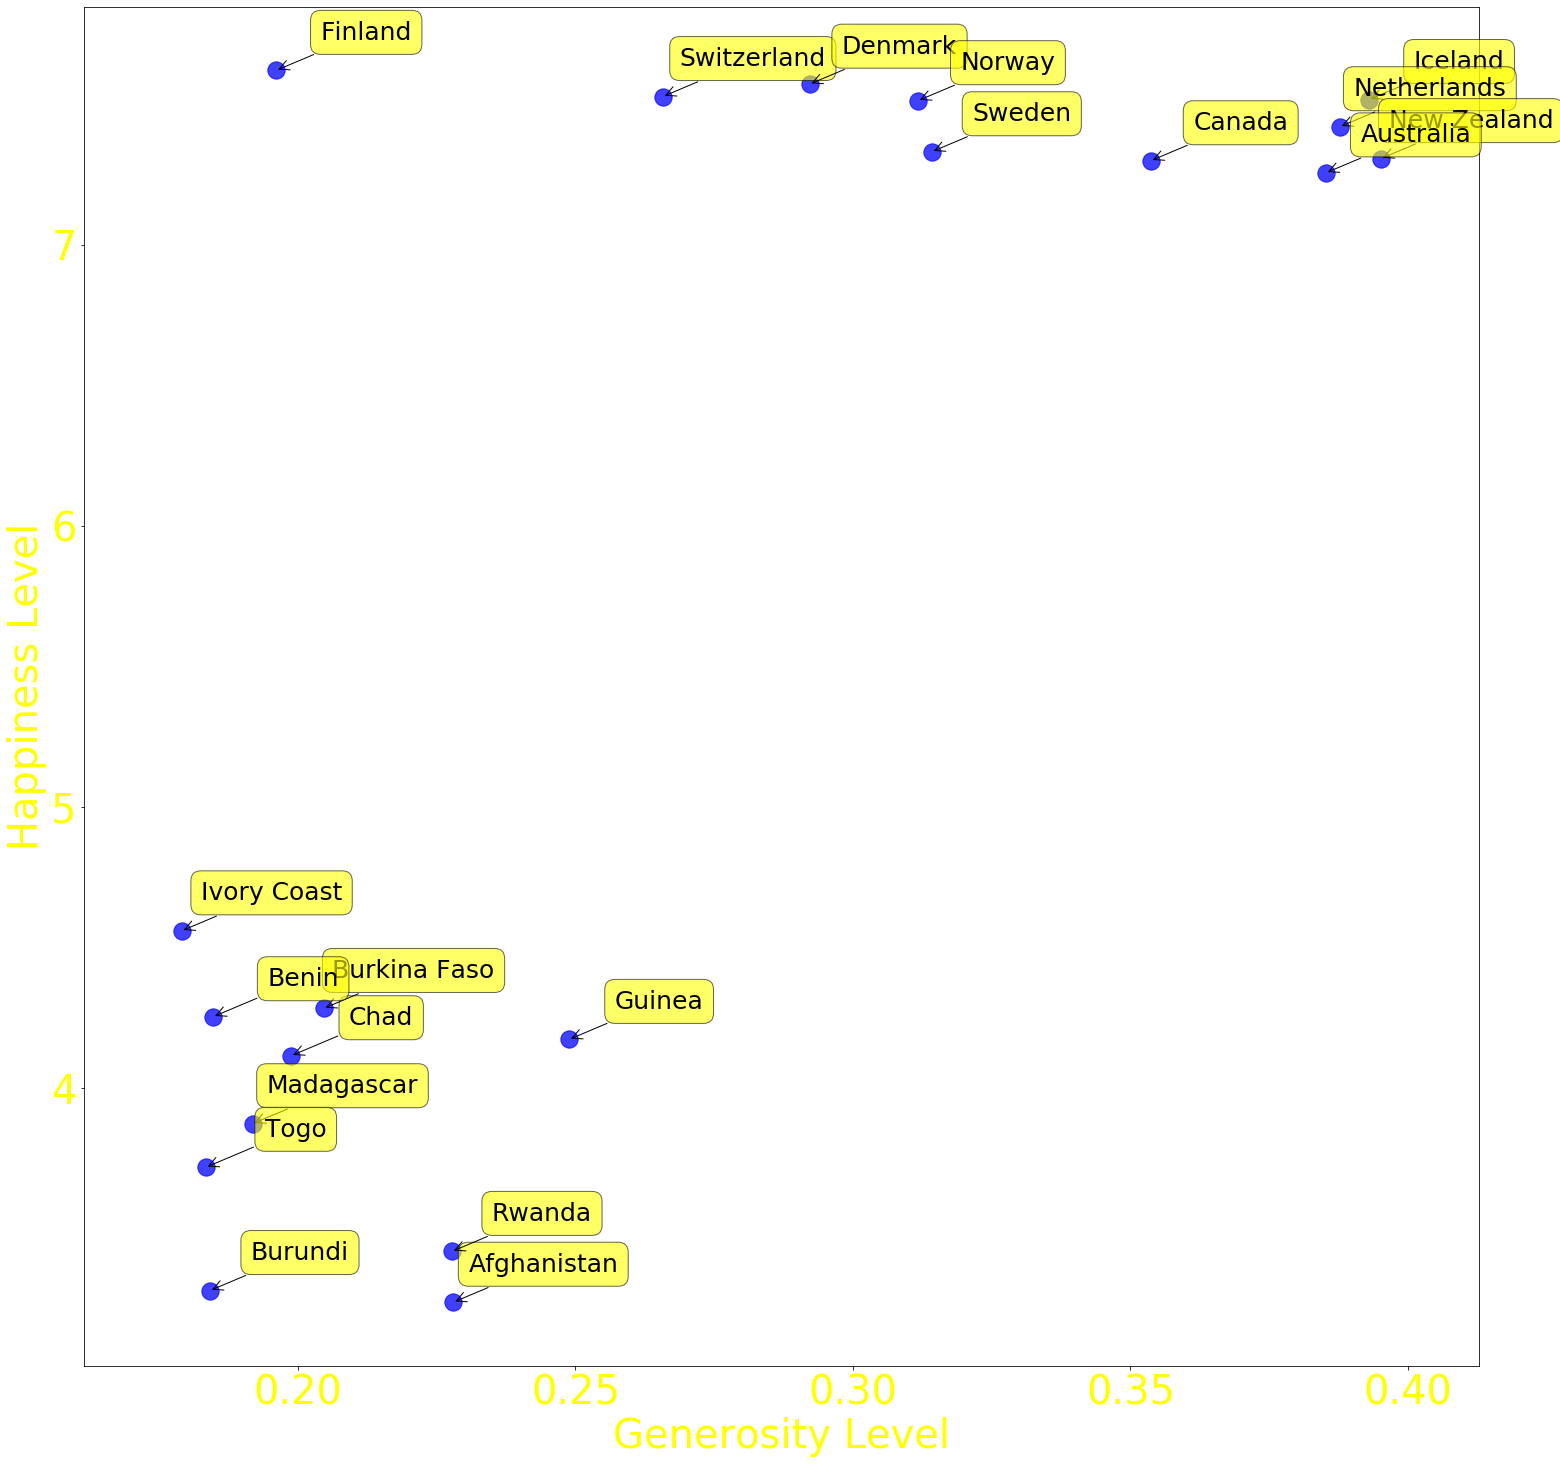

In [70]:
x_values = happySadGen['Average']
y_values = happySadHappiness['Average']
countryList = happySadGen['Country']

plt.figure(figsize=(25,25))
plt.xticks(fontsize=40, c='yellow')
plt.yticks(fontsize=40, c='yellow')
plt.xlabel('Generosity Level', c='yellow', fontsize=40)
plt.ylabel('Happiness Level', c='yellow', fontsize=40)

plt.scatter(x_values, y_values,marker="o",s=300, color='b', alpha=.75)

for label, x, y in zip(countryList, x_values, y_values):
    plt.annotate(
        label, size=25,
        xy=(x, y), xytext=(90, 50),
        textcoords='offset points', ha='center',va='top',
        bbox=dict(boxstyle='round, pad=.4', fc='yellow', alpha=0.6),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))   

In [19]:
countries = list(happySadGen['Country'])
countries

['Switzerland',
 'Iceland',
 'Denmark',
 'Norway',
 'Canada',
 'Finland',
 'Netherlands',
 'Sweden',
 'New Zealand',
 'Australia',
 'Madagascar',
 'Chad',
 'Guinea',
 'Ivory Coast',
 'Burkina Faso',
 'Afghanistan',
 'Rwanda',
 'Benin',
 'Burundi',
 'Togo']

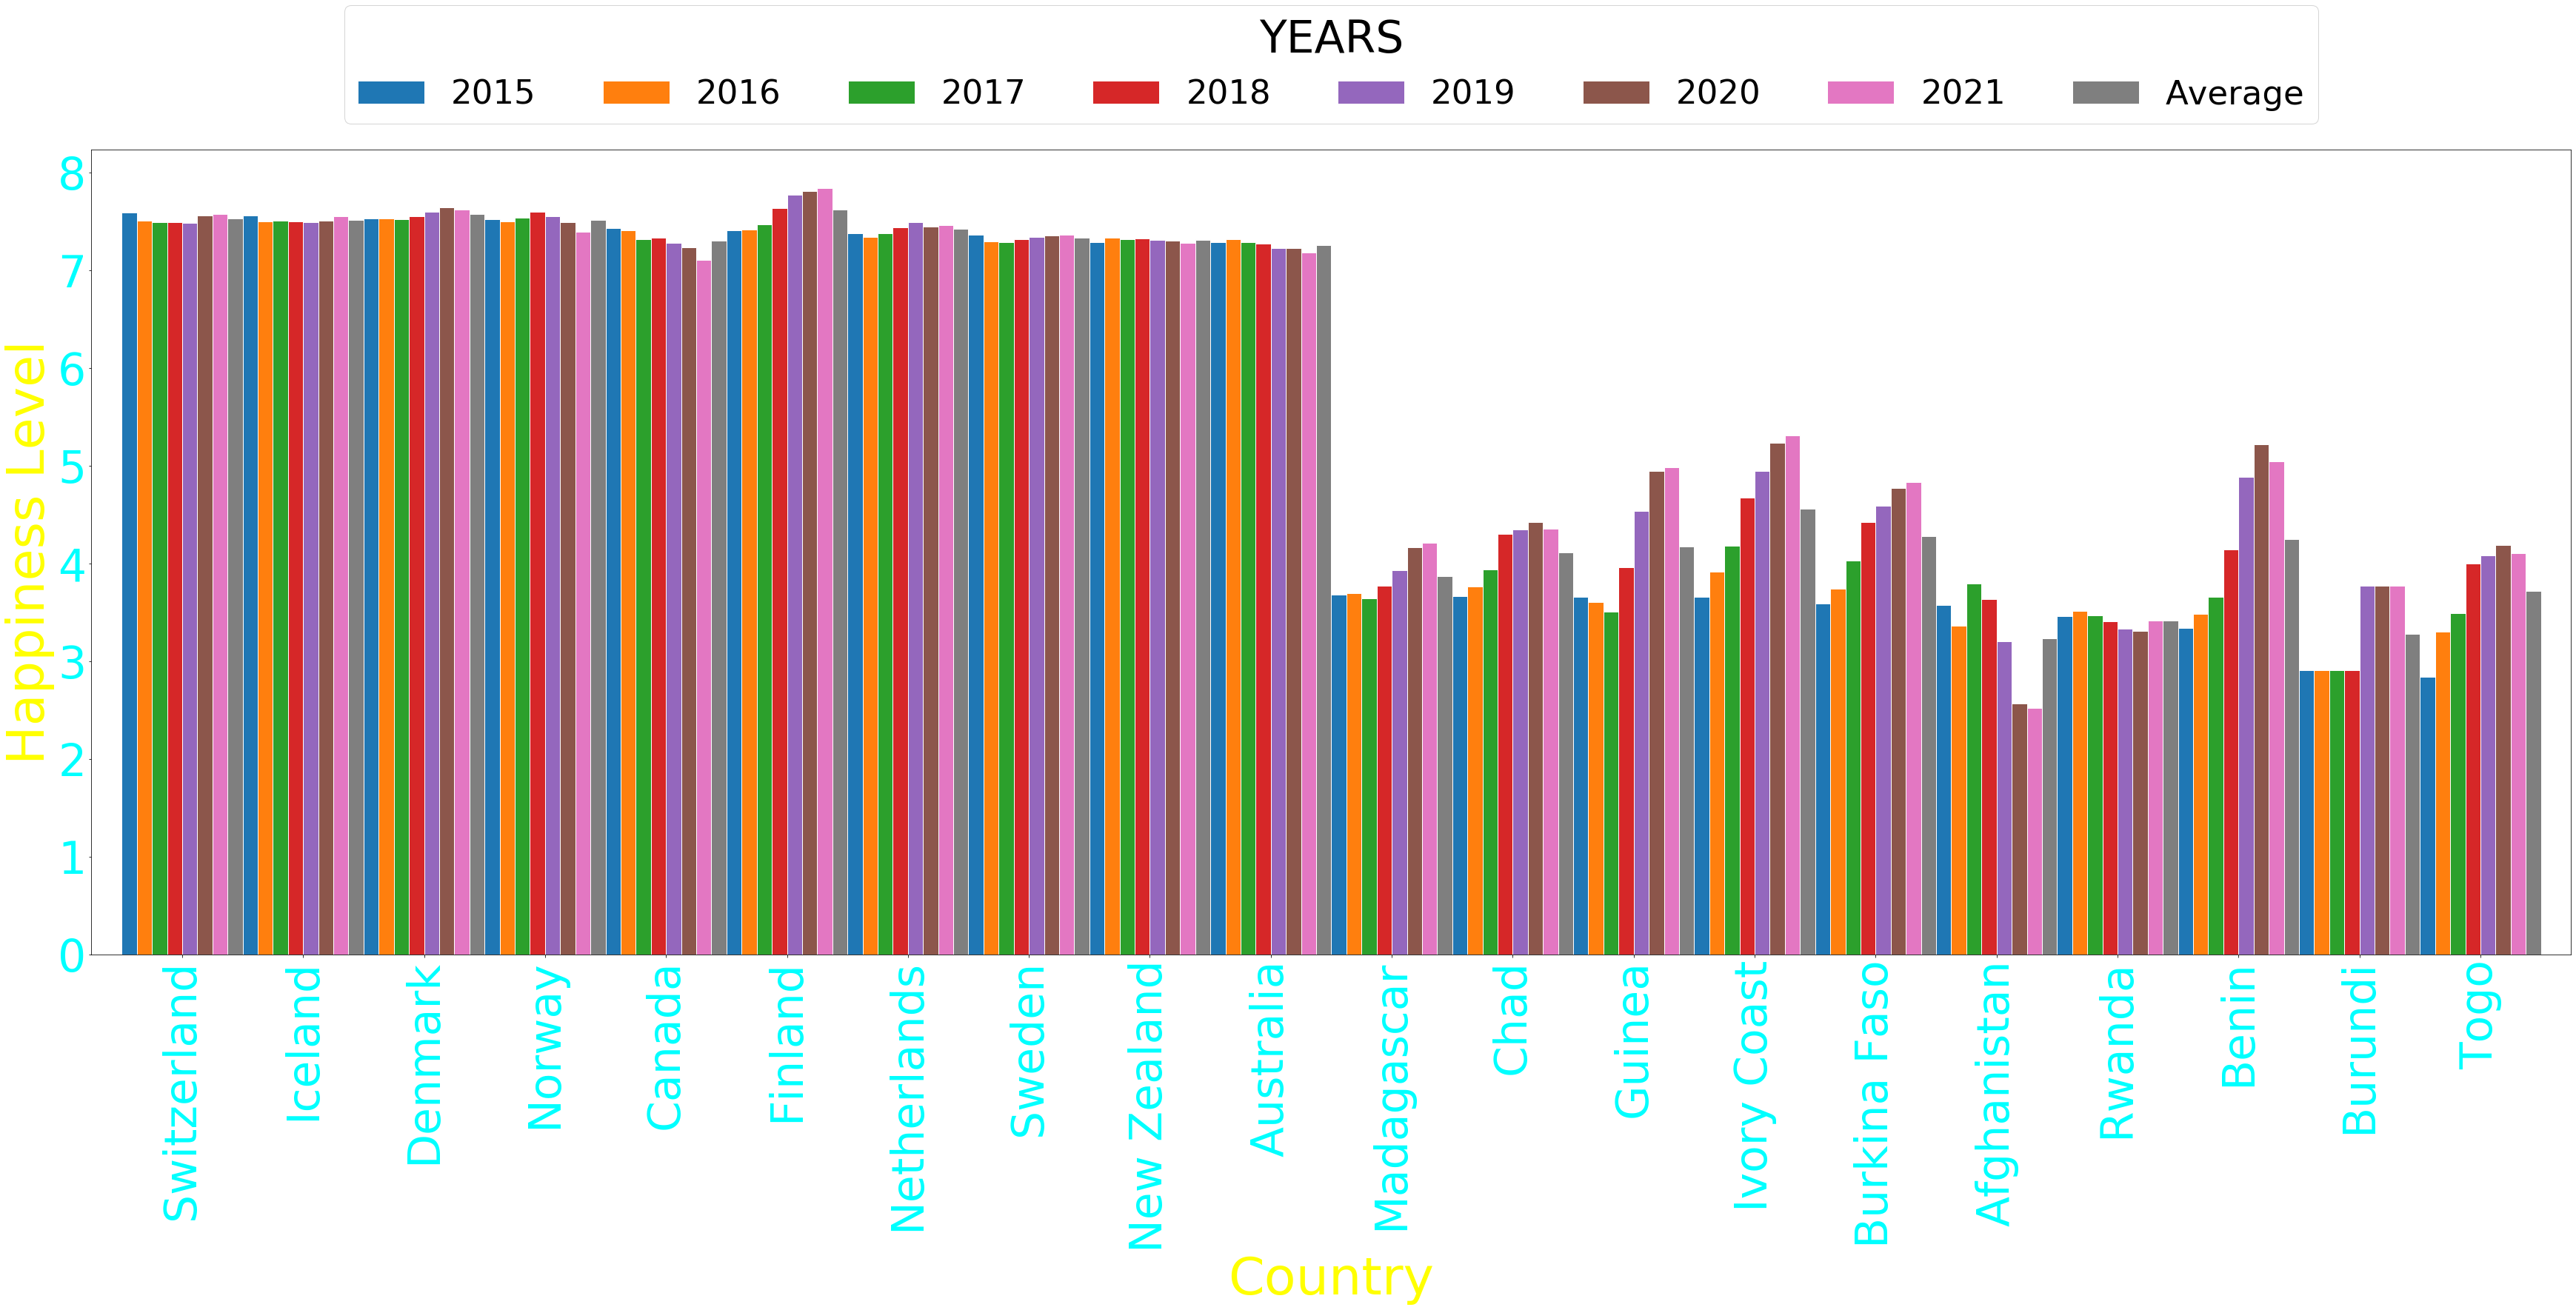

In [60]:
#prind the happyDadHappiness DF to show how countries average happiness has changed over the last 7 years
happySadHappiness.plot.bar(figsize=(60, 20), width=1, edgecolor='white' ,linewidth = 1)

tickvalues = happySadHappiness.index
plt.xticks(ticks = tickvalues ,labels = countries, rotation = 'vertical', fontsize=60, c='aqua')
plt.yticks(fontsize=60, c='aqua')
plt.xlabel("Country", fontsize=70, c='yellow')
plt.ylabel("Happiness Level", fontsize=70, c='yellow')
plt.legend(title="YEARS", fontsize=45, title_fontsize=60,bbox_to_anchor=(.5, 1.2),loc='upper center', ncol=8)

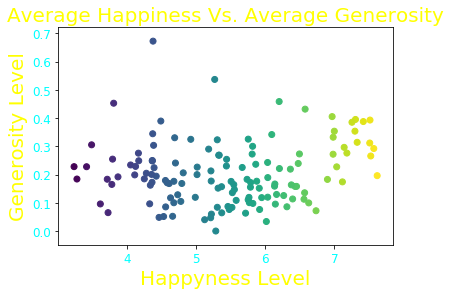

In [54]:
#get the average for x and y axis
x_all = happyAll['Avg_Happiness']
y_all = genAll['Avg_Generosity']

#Set plot points and plot the scatter
plt.title('Average Happiness Vs. Average Generosity', fontsize=20, c='yellow')
plt.xlabel('Happyness Level', fontsize=20, c='yellow')
plt.ylabel('Generosity Level', fontsize=20, c='yellow')
#Set XTICKS
tickvalues = happySadHappiness.index
plt.xticks(fontsize=12, c='aqua')
plt.yticks(fontsize=12, c='aqua')
#plot scatter plot
plt.scatter(x_all,y_all, c=(happyAll['Avg_Happiness']))


### Checking to see if countries that have a higher happiness score are more generous then those countries that have the lowest happiness scores

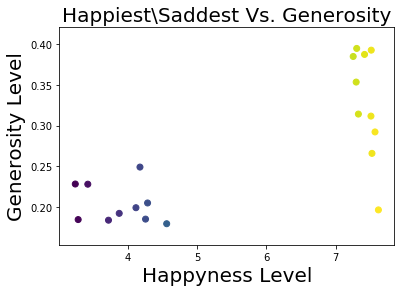

In [22]:
# get the average for x and y axis
x_axis = happySadHappiness['Average']
y_axis = happySadGen['Average']

# Set plot points and plot the scatter
plt.title('Happiest\Saddest Vs. Generosity' , fontsize=20)
plt.xlabel('Happyness Level', fontsize=20)
plt.ylabel('Generosity Level', fontsize=20)
plt.scatter(x_axis,y_axis, c=(happySadHappiness['Average']))


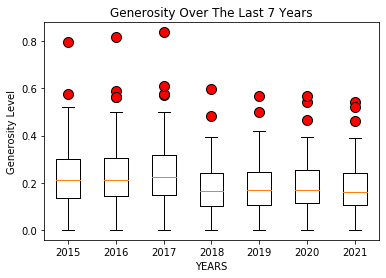

In [46]:
gen2015 = genAll['Generosity2015']
gen2016 = genAll['Generosity2016']
gen2017 = genAll['Generosity2017']
gen2018 = genAll['Generosity2018']
gen2019 = genAll['Generosity2019']
gen2020 = genAll['Generosity2020']
gen2021 = genAll['Generosity2021']
allGenesosity = [gen2015,gen2016,gen2017,gen2018,gen2019,gen2020,gen2021]

fig1, ax1 = plt.subplots()
ax1.set_title('Generosity Over The Last 7 Years')
ax1.set_ylabel('Generosity Level')
ax1.set_xlabel('YEARS')

flierprops = dict(marker='o', markerfacecolor='r', markersize=10, linestyle='none')
ax1.boxplot(allGenesosity, labels=["2015","2016","2017","2018","2019","2020","2021"]
            ,flierprops=flierprops)
plt.show()

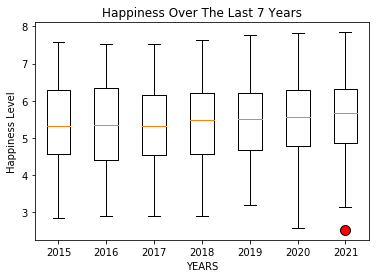

In [47]:
happy2015 = happyAll['Happiness2015']
happy2016 = happyAll['Happiness2016']
happy2017 = happyAll['Happiness2017']
happy2018 = happyAll['Happiness2018']
happy2019 = happyAll['Happiness2019']
happy2020 = happyAll['Happiness2020']
happy2021 = happyAll['Happiness2021']
allHappy = [happy2015,happy2016,happy2017,happy2018,happy2019,happy2020,happy2021]

fig1, ax1 = plt.subplots()
ax1.set_title('Happiness Over The Last 7 Years')
ax1.set_ylabel('Happiness Level')
ax1.set_xlabel('YEARS')

flierprops = dict(marker='o', markerfacecolor='r', markersize=10, linestyle='none')
ax1.boxplot(allHappy, labels=["2015","2016","2017","2018","2019","2020","2021"]
            ,flierprops=flierprops)
plt.show()

## Get the Top 50 most Generous Countries and compare to their happiness level

In [105]:
generosityDF = happyData.groupby('Country')[['Generosity2015','Happiness2015','Generosity2016','Happiness2016','Generosity2017','Happiness2017','Generosity2018','Happiness2018','Generosity2019','Happiness2019','Generosity2020','Happiness2020','Generosity2021','Happiness2021']].mean()
generosityDF = generosityDF.sort_values(by =['Generosity2015','Generosity2016','Generosity2017','Generosity2018','Generosity2019','Generosity2020','Generosity2021'], ascending=[False,False,False,False,False,False,False])
top50Generous = generosityDF.head(50)
top50Generous

,Generosity2015,Happiness2015,Generosity2016,Happiness2016,Generosity2017,Happiness2017,Generosity2018,Happiness2018,Generosity2019,Happiness2019,Generosity2020,Happiness2020,Generosity2021,Happiness2021
Country,,,,,,,,,,,,,,
Myanmar,0.79588,4.307,0.81971,4.395,0.838075,4.545,0.598,4.308,0.566,4.360,0.569814,4.3080,0.520,4.426
Thailand,0.57630,6.455,0.58696,6.474,0.572123,6.424,0.364,6.072,0.359,6.008,0.376709,5.9988,0.375,5.985
United Kingdom,0.51912,6.867,0.50156,6.725,0.492774,6.714,0.262,7.190,0.348,7.054,0.373433,7.1645,0.340,7.064
Malta,0.51752,6.302,0.56237,6.488,0.574731,6.527,0.376,6.627,0.375,6.726,0.341181,6.7728,0.275,6.602
Indonesia,0.51535,5.399,0.56521,5.314,0.611705,5.262,0.484,5.093,0.498,5.192,0.542647,5.2856,0.541,5.345
Netherlands,0.47610,7.378,0.47416,7.339,0.470490,7.377,0.333,7.441,0.322,7.488,0.336318,7.4489,0.302,7.464
New Zealand,0.47501,7.286,0.49401,7.334,0.500005,7.314,0.365,7.324,0.330,7.307,0.325726,7.2996,0.276,7.277
Haiti,0.46187,4.518,0.47958,4.028,0.489204,3.603,0.392,3.582,0.419,3.597,0.463910,3.7208,0.463,3.615
Ireland,0.45901,6.940,0.44963,6.907,0.427858,6.977,0.307,6.977,0.298,7.021,0.295427,7.0937,0.238,7.085


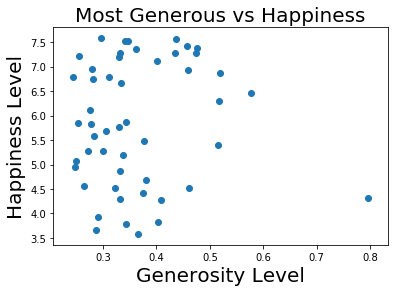

In [106]:
# get the average for x and y axis
topGen_X = top50Generous['Generosity2015']
topGen_Y = top50Generous['Happiness2015']

# Set plot points and plot the scatter
plt.title('Most Generous vs Happiness' , fontsize=20)
plt.xlabel('Generosity Level', fontsize=20)
plt.ylabel('Happiness Level', fontsize=20)
plt.scatter(topGen_X,topGen_Y)

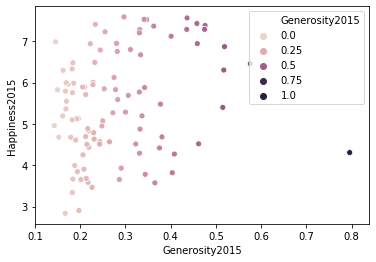

In [95]:
sns.scatterplot(data=top50Generous, x='Generosity2015', y='Happiness2015', hue='Generosity2015')

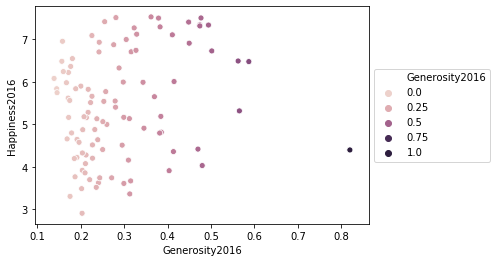

In [104]:
graph = sns.scatterplot(data=top50Generous, x='Generosity2016', y='Happiness2016', hue='Generosity2016')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

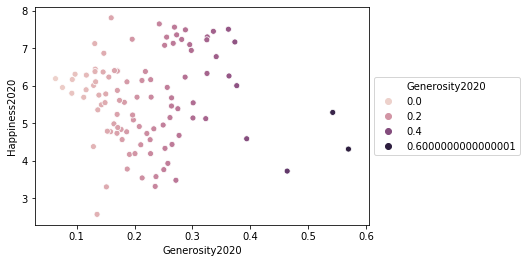

In [103]:
graph =sns.scatterplot(data=top50Generous, x='Generosity2020', y='Happiness2020', hue='Generosity2020')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

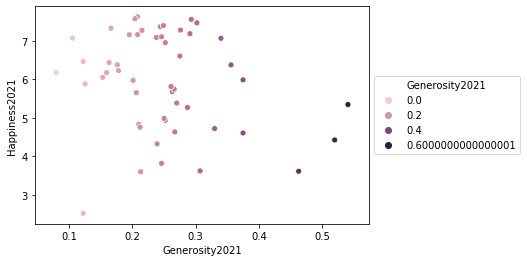

In [107]:
graph =sns.scatterplot(data=top50Generous, x='Generosity2021', y='Happiness2021', hue='Generosity2021')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

## Get the  50 least Generous Countries and compare to their happiness level

In [114]:
generosityLowDF = happyData.groupby('Country')[['Generosity2015','Happiness2015','Generosity2016','Happiness2016','Generosity2017','Happiness2017','Generosity2018','Happiness2018','Generosity2019','Happiness2019','Generosity2020','Happiness2020','Generosity2021','Happiness2021']].mean()
generosityLowDF = generosityLowDF.sort_values(by =['Generosity2015','Generosity2016','Generosity2017','Generosity2018','Generosity2019','Generosity2020','Generosity2021'], ascending=[True,True,True,True,True,True,True])
lowest50Generous = generosityLowDF.head(50)
lowest50Generous

,Generosity2015,Happiness2015,Generosity2016,Happiness2016,Generosity2017,Happiness2017,Generosity2018,Happiness2018,Generosity2019,Happiness2019,Generosity2020,Happiness2020,Generosity2021,Happiness2021
Country,,,,,,,,,,,,,,
Greece,0.00000,4.857,0.00000,5.033,0.000000,5.227,0.000,5.358,0.000,5.287,0.000000,5.5150,0.000,5.723
Russia,0.00199,5.716,0.02736,5.856,0.052264,5.963,0.065,5.810,0.082,5.648,0.099042,5.5460,0.115,5.477
Lithuania,0.02641,5.833,0.02025,5.813,0.010165,5.902,0.026,5.952,0.043,6.149,0.053691,6.2155,0.056,6.255
Croatia,0.05444,5.759,0.18434,5.488,0.248003,5.293,0.120,5.321,0.119,5.432,0.113999,5.5047,0.111,5.882
Georgia,0.05547,4.297,0.06786,4.252,0.054009,4.286,0.038,4.340,0.043,4.519,0.047610,4.6726,0.032,4.891
Venezuela,0.05841,6.810,0.04250,6.084,0.065020,5.250,0.056,4.806,0.064,4.707,0.087179,5.0532,0.078,4.892
Tunisia,0.06431,4.739,0.03936,5.045,0.049693,4.805,0.040,4.592,0.059,4.461,0.055881,4.3922,0.057,4.596
Gabon,0.06822,3.896,0.06244,4.121,0.043785,4.465,0.032,4.758,0.043,4.799,0.052014,4.8293,0.058,4.852
Morocco,0.07172,5.013,0.04053,5.151,0.032210,5.235,0.026,5.254,0.036,5.208,0.040033,5.0948,0.034,4.918


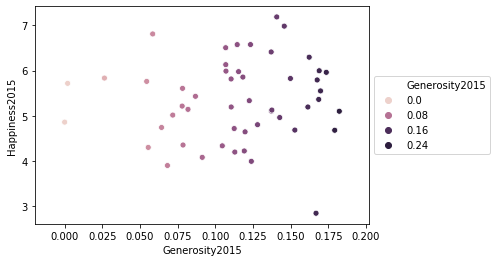

In [116]:
graph = sns.scatterplot(data=lowest50Generous, x='Generosity2015', y='Happiness2015', hue='Generosity2015')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

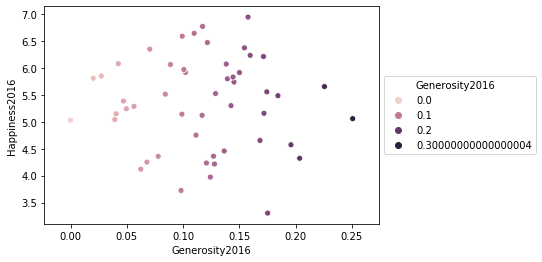

In [117]:
graph = sns.scatterplot(data=lowest50Generous, x='Generosity2016', y='Happiness2016', hue='Generosity2016')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

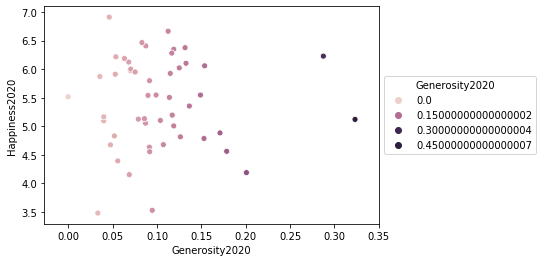

In [118]:
graph = sns.scatterplot(data=lowest50Generous, x='Generosity2020', y='Happiness2020', hue='Generosity2020')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

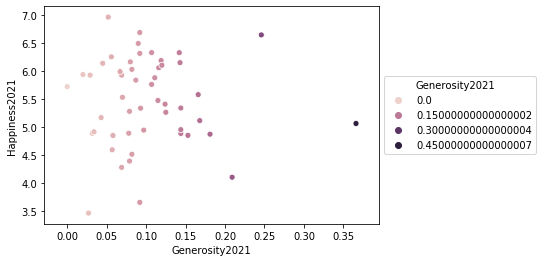

In [119]:
graph = sns.scatterplot(data=lowest50Generous, x='Generosity2021', y='Happiness2021', hue='Generosity2021')
graph.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [125]:
happySadHappiness.tail(10)

,Country,2015,2016,2017,2018,2019,2020,2021,Average
11,Chad,3.667,3.763,3.936,4.301,4.35,4.4227,4.355,4.11353
12,Guinea,3.656,3.607,3.507,3.964,4.534,4.9493,4.984,4.17161
13,Ivory Coast,3.655,3.916,4.18,4.671,4.944,5.2333,5.306,4.5579
14,Burkina Faso,3.587,3.739,4.032,4.424,4.587,4.7687,4.834,4.28167
15,Afghanistan,3.575,3.36,3.794,3.632,3.203,2.5669,2.523,3.23627
16,Rwanda,3.465,3.515,3.471,3.408,3.334,3.3123,3.415,3.41719
17,Benin,3.34,3.484,3.657,4.141,4.883,5.216,5.045,4.25229
18,Burundi,2.905,2.905,2.905,2.905,3.775,3.7753,3.775,3.2779
19,Togo,2.839,3.303,3.495,3.999,4.085,4.1872,4.107,3.71646
Country,Chad,Chad,Chad,Chad,Chad,Chad,Chad,Chad,Chad
